In [2]:
# Dependencies
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymongo
import json

# Data path
data_path="Resources/data.csv"

# Read csv file load into a dataframe
tumor_df = pd.read_csv(data_path, delimiter=",")
tumor_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
# Deleting column with no values
tumor_df.drop(columns=['Unnamed: 32'], inplace=True)
print(len(tumor_df))

569


array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

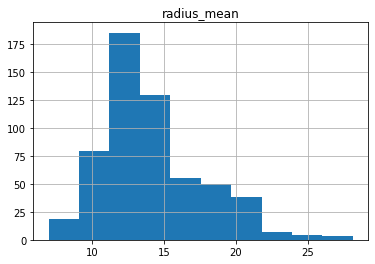

In [4]:
# Initial visualization to understand the data
tumor_df.hist("radius_mean")

In [5]:
# Calculating percentiles to divide the csv files into five csv files.
percent_list=list(np.percentile(tumor_df.radius_mean,[20,40,60,80,100]))
percent_list

[11.366, 12.726, 14.058000000000002, 17.067999999999998, 28.11]

In [6]:
# Create csv files based on the percentiles
df1=tumor_df.loc[tumor_df.radius_mean<percent_list[0]]
df1.to_csv(r"Resources\tumor1.csv", index=False)

df2=tumor_df.loc[(tumor_df.radius_mean>=percent_list[0]) & (tumor_df.radius_mean<percent_list[1])]
df2.to_csv(r"Resources\tumor2.csv", index=False)

df3=tumor_df.loc[(tumor_df.radius_mean>=percent_list[1]) & (tumor_df.radius_mean<percent_list[2])]
df3.to_csv(r"Resources\tumor3.csv", index=False)

df4=tumor_df.loc[(tumor_df.radius_mean>=percent_list[2]) & (tumor_df.radius_mean<percent_list[3])]
df4.to_csv(r"Resources\tumor4.csv",index=False)

df5=tumor_df.loc[tumor_df.radius_mean>=percent_list[3]]
df5.to_csv(r"Resources\tumor5.csv",index=False)

In [7]:
# Function to create json files
def createJson(csvName, jsonName):    
    
    # loading csv files to dataframe
    df1 = pd.read_csv(csvName, encoding = 'ISO-8859-1')

    # saving dataframe to json file
    df1.to_json(jsonName)
    
# Call function to create json files    
createJson("Resources/tumor1.csv", "Resources/tumor1.json")
createJson("Resources/tumor2.csv", "Resources/tumor2.json")
createJson("Resources/tumor3.csv", "Resources/tumor3.json")
createJson("Resources/tumor4.csv", "Resources/tumor4.json")
createJson("Resources/tumor5.csv", "Resources/tumor5.json")

In [8]:
# Connect to mongodb
myclient = MongoClient("mongodb://localhost:27017")

# create new database name: BreastCancer_DB
db = myclient["BreastCancer_DB"]

In [9]:
# Function to load json files into Mongo database
def createDB(jsonName, collName):
    
    # Create or Switch to collection name
    Col = db[collName]

    # Dropping collection if exists to avoid duplication
    Col.drop()

    # Loading or Opening the json file
    with open(jsonName, 'r') as file:
        file_data = json.load(file)

    # Inserting the loaded file to the Collection
    # if JSON contains data more than one entry
    # use 'insert_many' else use 'insert_one'
    if isinstance(file_data, list):
        Col.insert_many(file_data)  
    else:
        Col.insert_one(file_data)

# Function call to create collections in Mongo database
createDB("Resources/tumor1.json", "tumor1")
createDB("Resources/tumor2.json", "tumor2")
createDB("Resources/tumor3.json", "tumor3")
createDB("Resources/tumor4.json", "tumor4")
createDB("Resources/tumor5.json", "tumor5")

In [24]:
t2 = db.get_collection("tumor2")
for index, (key, value) in enumerate(t2.find_one().items()):
    if index == 6:
        print(key, '::', value)
        break

area_mean :: {'0': 386.1, '1': 477.1, '2': 475.9, '3': 440.6, '4': 449.3, '5': 427.9, '6': 437.6, '7': 409.0, '8': 499.0, '9': 470.9, '10': 401.5, '11': 443.3, '12': 466.1, '13': 451.1, '14': 412.6, '15': 458.7, '16': 412.5, '17': 466.7, '18': 480.4, '19': 438.6, '20': 403.3, '21': 455.8, '22': 423.6, '23': 399.8, '24': 398.0, '25': 432.8, '26': 432.0, '27': 460.3, '28': 448.6, '29': 419.8, '30': 464.5, '31': 464.1, '32': 402.0, '33': 420.3, '34': 428.9, '35': 463.7, '36': 477.4, '37': 461.0, '38': 481.9, '39': 428.0, '40': 432.2, '41': 496.4, '42': 476.5, '43': 406.3, '44': 407.4, '45': 435.6, '46': 427.3, '47': 489.0, '48': 441.0, '49': 396.0, '50': 432.7, '51': 492.1, '52': 431.1, '53': 471.3, '54': 403.1, '55': 417.2, '56': 418.7, '57': 409.1, '58': 481.6, '59': 461.4, '60': 477.3, '61': 457.9, '62': 489.9, '63': 446.0, '64': 464.4, '65': 420.3, '66': 445.3, '67': 402.7, '68': 426.7, '69': 421.0, '70': 485.8, '71': 491.9, '72': 458.4, '73': 447.8, '74': 462.9, '75': 462.0, '76': 44